In [17]:
from pprint import pprint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# About Dataset
# Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

# Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary * education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* These grades are related with the course subject, Math or Portuguese:

* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [3]:
path = "../data/student_mat.csv"
df = pd.read_csv(path)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Для чего мы используем Pandas?

 - Загрузка/выгрузка небольших табличных данных
 - Первоначальный анализ данных(смотрим различные статистики, перекосы, пропуски в данных)
 - Удобная работа с разными срезами данных(условия на индексы/номера строк/столбцов, условия на равенство/неравенство величин в столбцах, объединение и конкатенация таблиц)
 - Все библиотеки для визуализации данных совместимы с Pandas, так что мы можем очень легко строить графики, передавая Pandas DataFrame и названия колонок для визуального анализа данных

In [6]:
# Посмотрим какие у нас есть колонки
df.columns.tolist()


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [42]:
# Посмотрим сколько пропусков в каждом столбце
df.isna().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

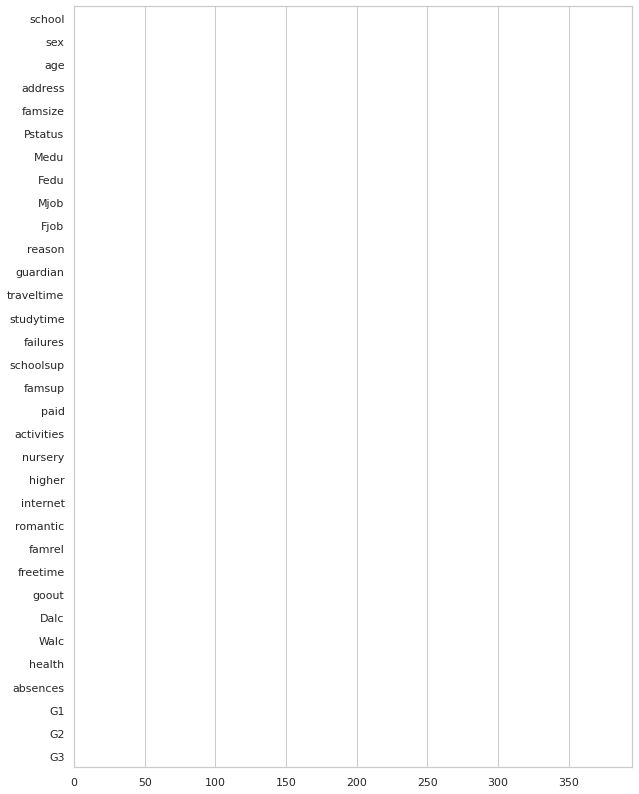

In [53]:
# то же самое, только графиком
# если бы значения были ненулевыми, то выглядело бы неплохо)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 14))
sns.barplot(
    x=df.isna().sum(),
    y=df.columns.tolist(),
    orient="h",
)
plt.xlim(0, df.shape[0])
plt.show()


In [55]:
# видим
# - номера столбцов
# - название столбцов
# - кол-во не пустых значений
# - тип колонки(можно привести к нужному, если видим какое-то несовпадение)

# - кол-во затрачиваемой памяти

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [81]:
# value_counts считает количество каждого
# встречающегося значения столбца и сортирует по частоте

# индексы - уникальные значения столбца
# значения - # этого значения в столбце
df["age"].value_counts()


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

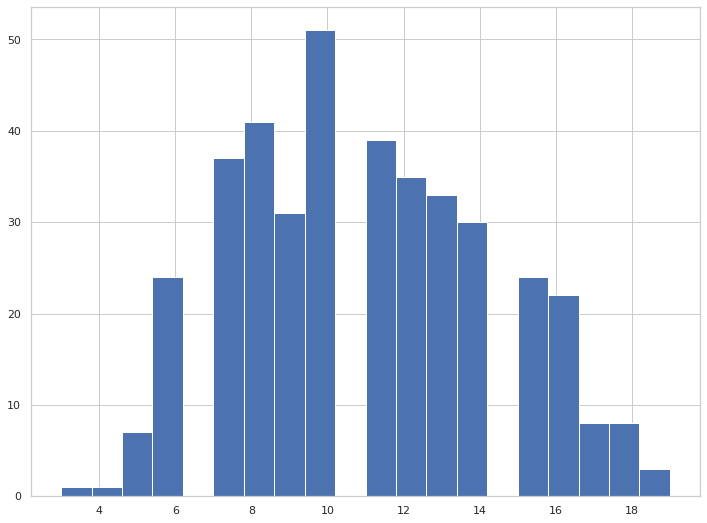

In [64]:
# values counts через гистограмму
# удобно смотреть на распределение фичи глазами
plt.figure(figsize=(12,9))
df["G1"].hist(bins=20)  # value_counts()
plt.show()


# Срезы в Pandas(GOTO добавить информацию про включение и невключение концов срезов)

## Срезы через оператор квадратных скобок **[]**

**Особенности**
 - Обычно везде срез по 0-ому индексу считается срезом по строкам. Мы выбираем строки, которые хотим получить. Но в Pandas это работает не так. Тут оператор **[]** выбирает столбец по его индексу(__не порядковому номеру, а по его названию__)
 - Если передавать в **[]** 1 значение названия столбца, то возвращаться будет Pandas Series, если передавать список или np.array названий столбцов, то возвращаться будет Pandas DataFrame

In [110]:
print(f"Тип возвращаемого объекта при срезе через 1 значение\n{type(df['G1'])}")
print(f"Тип возвращаемого объекта при срезе через список значений\n{type(df[['G1']])}")
print(
    f"Тип возвращаемого объекта при срезе через np.array значений\n{type(df[np.array(['G1'])])}"
)


Тип возвращаемого объекта при срезе через 1 значение
<class 'pandas.core.series.Series'>
Тип возвращаемого объекта при срезе через список значений
<class 'pandas.core.frame.DataFrame'>
Тип возвращаемого объекта при срезе через np.array значений
<class 'pandas.core.frame.DataFrame'>


Попробуем обратиться к 0-ой строке через []


In [117]:
try:
    display(df[0])  # df[df.index[0]]
except BaseException as e:
    print(e)


0


In [116]:
try:
    display(df["G1"])
except BaseException as e:
    print(e)


0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

#### Обращение к Pandas DataFrame через оператор квадратных скобок считается плохой практикой, потому что он работает не интуитивно понятно. Для этого нужно знать Pandas. Для этого обычно используют другие ф-ции срезов.

## Срез через **.loc**

**Особенности**

 - Работает по обычному: сначала по строкам, потом по столбцам
 - Срез делается по индексам(__df.index для строк и df.columns для столбцов. Не порядковым номерам строк и столбцов__)


In [124]:
# возвращается строка
display(df.loc[0])

# возвращается столбец
display(df.loc[:, "G1"])

# возвращается значение на пересечении 0 стоки и столбца G1
display(df.loc[0, "G1"])

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
sum_grade          17
Name: 0, dtype: object

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

5

## Срез через **.iloc**

**Особенности**

 - Срез через **.iloc** так же работает по обычному и берёт сначала строки, а потом уже столбцы
 - Срез **.iloc** работает не с индексами Pandas DataFrame, а с порядковыми номерами строк и столбцов Pandas DataFrame. (Самый математический метод среза. Срез как в numpy)

In [129]:
G1_index = df.columns.tolist().index("G1")
print(f"Номер столбца с названием G1 = {G1_index}")

# возвращает строку
display(df.iloc[0])

# вовзаращет столбец
display(df.iloc[:, G1_index])

# возвращает значение на пересечении 0-ой строки и 30-ого столбца
df.iloc[0, 30]


Номер столбца с названием G1 = 30


school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
sum_grade          17
Name: 0, dtype: object

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

5

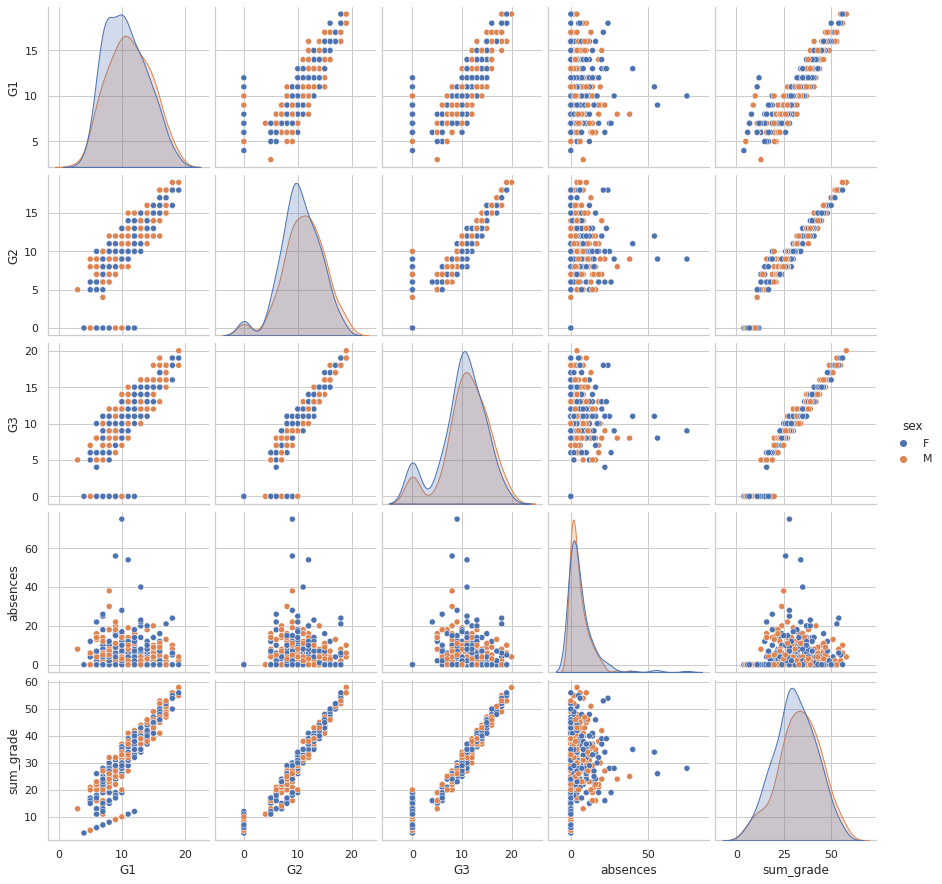

In [66]:
df["sum_grade"] = df[["G1", "G2", "G3"]].sum(axis=1)

some_cols = ["G1", "G2", "G3", "absences", "sum_grade", "sex"]

sns.pairplot(df[some_cols], hue="sex")
plt.show()


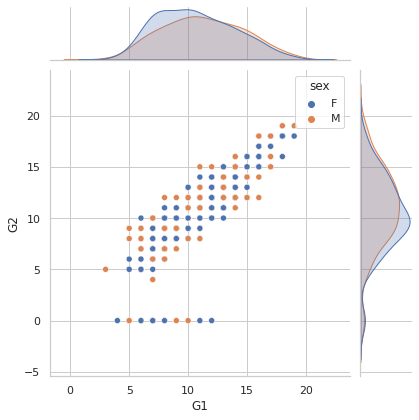

In [80]:
# можно смотреть на совместное распределение только 2х фичей и их гистрограммы
# с помощью joinplot
sns.jointplot(data=df, x="G1", y="G2", hue="sex")
plt.show()
